# ELG7186 - Assignment 1 - Is this an intrusion?

---
Here different methods were used to enhance the model performance as deep  learning model, ensemble model and machine learning models.

* Stacking using SGDClassifier and Multi-layer perceptron with Logistic Regression as a final estimator 

* Development of neural network using keras

* Decision tree









# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
from sklearn.metrics import f1_score
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from subprocess import check_output
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegressionCV
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE 

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


#Mounting to drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/kaggle data')

In [4]:
def save(predictions,name='name'):
  file= pd.DataFrame(predictions, columns =  ['Class'] )
  file = file.rename_axis('ID')
  file.to_csv(name)

#Data-Preprocessing

---
**Pipeline**:

*   **Cleaning**: Remove columns contains only zeros values of columns and columns with only one ot two different values as well 
*   **Encoding**  using Label encoding then Hot encoding
*  **Feature Selection** using **Wrapper** method 
* **Scaling** the selected features by **StandardScaler** to remove outliers and center the data followed by **MinMaxScalar** to normalize the data between 0 and 1.
* **Resampling** using ( SMOTE+ TomekSMOTE+ ENN)


##loading

In [8]:
traindata=pd.read_csv("traindata.csv")
testdata=pd.read_csv("testdata.csv")

In [9]:
traindata.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,0,tcp,http,SF,295,2584,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,0.0,0.0,0.0,0.0,1.0,0.0,0.67,101,255,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,1,0,tcp,http,SF,312,839,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,7,0.0,0.0,0.0,0.0,1.0,0.0,0.29,223,255,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,2,0,tcp,ftp,SF,1225,2451,0,0,0,28,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,116,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,3,0,tcp,http,SF,293,296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.50,216,255,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,4,0,tcp,X11,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.5,1.0,0.5,1.0,0.00,115,1,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0


In [10]:
print('shape of train data', traindata.shape)
print('shape of test data', testdata.shape)

shape of train data (23002, 44)
shape of test data (22501, 43)


In [11]:
#labels
labeltrain= traindata['Class']
np.unique(labeltrain ,return_counts=True )

(array([0, 1]), array([12001, 11001]))

In [12]:
train_data=traindata.drop("num_outbound_cmds",axis=1)
train_data=train_data.drop("land",axis=1)
train_data=train_data.drop("ID",axis=1)
train_data=train_data.drop("urgent",axis=1)
train_data=train_data.drop("is_host_login",axis=1)
train_data = train_data.drop('Class',axis=1)

test_data=testdata.drop("num_outbound_cmds",axis=1)
test_data=test_data.drop("land",axis=1)
test_data=test_data.drop("ID",axis=1)
test_data=test_data.drop("urgent",axis=1)
test_data=test_data.drop("is_host_login",axis=1)

print('shape of train data', train_data.shape)
print('shape of test data', test_data.shape)

shape of train data (23002, 38)
shape of test data (22501, 38)


##Encoding all data by sklearn

In [13]:
categorical_train=train_data[['service','protocol_type' , 'flag'] ]
categorical_test=test_data[['service','protocol_type' , 'flag'] ]

numerical_train = train_data.drop(['service','protocol_type' , 'flag'] , axis=1)
numerical_test = test_data.drop(['service','protocol_type' , 'flag'] , axis=1)


#Label encoding
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
le = preprocessing.LabelEncoder()

cate_alltrain= categorical_train.apply(le.fit_transform)
cate_alltest= categorical_test.apply(le.fit_transform)


labelencode_train=pd.concat([numerical_train, cate_alltrain], axis=1, join='inner')
labelencode_test = pd.concat([numerical_test, cate_alltest], axis=1, join='inner')

#scaling
scaled_labelencode_train=pd.DataFrame(scaler.fit_transform(labelencode_train))
scaled_labelencode_test=pd.DataFrame(scaler.fit_transform(labelencode_test))

#hot encoding
en = preprocessing.OneHotEncoder()
en.fit(cate_alltrain )

onehot_alltrain = pd.DataFrame(en.transform(cate_alltrain) .toarray())
onehot_alltest  = pd.DataFrame(en.transform(cate_alltest) .toarray())

hotencode_train=pd.concat([numerical_train, onehot_alltrain], axis=1, join='inner')
hotencode_test = pd.concat([numerical_test, onehot_alltrain], axis=1, join='inner')

#scaling
scaled_hotencode_train=pd.DataFrame(scaler.fit_transform(hotencode_train))
scaled_hotencode_test=pd.DataFrame(scaler.fit_transform(hotencode_test))

###Wrapper

In [15]:
##wrapper
import statsmodels.api as sm
selected_features = list(numerical_train.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_new = numerical_train[selected_features]
    X_new = sm.add_constant(X_new)
    model1 = sm.OLS(labeltrain,X_new).fit()
    p = pd.Series(model1.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_pmax = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_pmax)
    else:
        break
# selected_features

In [16]:
wrapper_train=train_data[[    'duration','wrong_fragment','hot','logged_in','num_compromised','su_attempted','num_root','num_file_creations','num_shells',
 'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
 'same_srv_rate', 'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate','level'  ]]

scaled_wrapper_train=scaler.fit_transform(wrapper_train)

In [17]:
wrapper_test=test_data[[    'duration','wrong_fragment','hot','logged_in','num_compromised','su_attempted','num_root','num_file_creations','num_shells',
 'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
 'same_srv_rate', 'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate','level'  ]]

scaled_wrapper_test=scaler.fit_transform(wrapper_test)

In [18]:
MinMax=preprocessing.MinMaxScaler()

In [19]:
minscaled_wrapper_train=MinMax.fit_transform(scaled_wrapper_train)
minscaled_wrapper_test=MinMax.fit_transform(scaled_wrapper_test)

In [20]:
#SMOTE+TOMEKSMOTE+SMOTEENN
X_res1, y_res1 =Pipeline(steps=[('r1', SMOTE(random_state=42)), ('r2',SMOTETomek(random_state=42))
,('r3', SMOTEENN(random_state=42))]).fit_resample(minscaled_wrapper_train,labeltrain)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_res1, y_res1, test_size=0.2, random_state=42 , stratify= y_res1)

#Keras

---
Four Dense layer were used to build the model and the model overfitting was solved by adding Regularization **l2** and Batchnormalization.

The model were trained using the wrapper feature selection method and data were splitted after that to train and validation to track the model performance, multiple threshold values were used for the probability of the test data and we observed that threshold with value 0.258 has achieved the higest f1_score compared to other values.

In [180]:
# !pip install keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras.regularizers import l2,l1
import tensorflow
from numpy.random import seed

seed(101)
tensorflow.random.set_seed(101)

model = Sequential()


model.add( Dense(32 ,kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.000001))

model.add( Dense(16))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.000001))

model.add( Dense(16))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.000001))

model.add(Dense(2,activation='sigmoid' ,kernel_regularizer='l2'))

In [181]:
from numpy.random import seed
seed(101)
tensorflow.random.set_seed(101)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras.metrics.BinaryAccuracy()])

Y_train = np_utils.to_categorical(y_train, 2)
Y_valid = np_utils.to_categorical(y_valid, 2)
history=model.fit(X_train ,Y_train, epochs=10, validation_data=(X_valid,Y_valid))

Epoch 1/10
596/596 [==============================] - 3s 4ms/step - loss: 0.4381 - binary_accuracy: 0.9359 - val_loss: 0.2706 - val_binary_accuracy: 0.9744
Epoch 2/10
596/596 [==============================] - 2s 3ms/step - loss: 0.2178 - binary_accuracy: 0.9801 - val_loss: 0.1934 - val_binary_accuracy: 0.9867
Epoch 3/10
596/596 [==============================] - 2s 3ms/step - loss: 0.1843 - binary_accuracy: 0.9827 - val_loss: 0.1647 - val_binary_accuracy: 0.9892
Epoch 4/10
596/596 [==============================] - 2s 3ms/step - loss: 0.1661 - binary_accuracy: 0.9851 - val_loss: 0.1503 - val_binary_accuracy: 0.9873
Epoch 5/10
596/596 [==============================] - 2s 3ms/step - loss: 0.1565 - binary_accuracy: 0.9854 - val_loss: 0.1572 - val_binary_accuracy: 0.9887
Epoch 6/10
596/596 [==============================] - 2s 3ms/step - loss: 0.1488 - binary_accuracy: 0.9875 - val_loss: 0.1468 - val_binary_accuracy: 0.9887
Epoch 7/10
596/596 [==============================] - 2s 3ms/ste

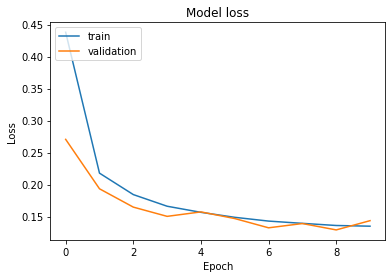

In [182]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [183]:
#training
trainpredict_prob = model.predict(X_train)
train_pred = trainpredict_prob.argmax(axis=-1)
#validation
validpredict_prob = model.predict(X_valid)
valid_pred = validpredict_prob.argmax(axis=-1)

print("f1 score of training = " ,f1_score(y_train,train_pred))
print("f1 score of Validation = ",f1_score(y_valid,valid_pred))

f1 score of training =  0.9901082882132445
f1 score of Validation =  0.9910435325973754


let's explore the missclassification predictions of validation data

In [ ]:
# for i in range(len(y_valid)):
#   if valid_pred[i] != y_valid [i] :
#     print("validation probability\n" , validpredict_prob[i])
#     print("True_labels", y_valid[i])
#     print("Predicted_labels", valid_pred[i])
#     print("\n\n")

In [184]:
testpredict_prob=model.predict(minscaled_wrapper_test)
# keras_pred=testpredict_prob.argmax(axis=-1)

# #threshold function
threshold_pred=[ ]
for i in range(len(testpredict_prob)):

  if testpredict_prob[i][1] >0.259:
    threshold_pred.append(1)
  else:
    threshold_pred.append(0)

print(np.unique(threshold_pred,return_counts=True))
keras_pred=threshold_pred

(array([0, 1]), array([ 9366, 13135]))


In [ ]:
# save(keras_pred,'reasonable_keras.csv') # f1 score on public : 0.92025

#Stacking

---
**SGM** and **MLP** were tuned and thier best parameters were used in stacking model where logistic Regression were used as a final estimator.



##svm

In [34]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42,early_stopping=True, validation_fraction=0.3, loss="perceptron" , alpha=0.001, penalty='l1')
sgd.fit(X_res1, y_res1)
sgd_pred = sgd.predict(minscaled_wrapper_test)
# save(sgd_pred,"sgd_pred.csv") #0.90858 on public

##MLP

---
**Model Tuning cell** is used to find the optimal parameters for the MLP model( it may consumes considerable time to run), however the final model is trained using these parameters in **Model Training cell**



###Model Tuning

####*Functions*

In [204]:
#plot runtime vs. accuracy with average line
import matplotlib.pyplot as plt

def plotAcc(total_acc, mean_acc, base = None, title=''):
  plt.plot(total_acc, marker='o', label = 'Accuracy')
  plt.axhline(mean_acc, color = 'orange', label='Average', xmin = 0.1, xmax = 0.9)
  plt.ylabel('Accuracy')
  plt.xlabel('Runtime')
  plt.title(title)
  if base != None:
    plt.axhline(base, color = 'red', label='Baseline', xmin = 0.1, xmax = 0.9)
  plt.legend()
  plt.show()

In [200]:
#Apply Multi Layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


def MLP(af,hidden_layer=(8,),learning_rate_init=0.1):
  number_runs = 10
  total_acc = []
  for i in range(number_runs):
    model = MLPClassifier(learning_rate_init=learning_rate_init,  max_iter=1000, activation=af, hidden_layer_sizes= hidden_layer ).fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = f1_score(y_valid, y_pred)
    total_acc.append(accuracy)
    
  return total_acc


####Activation Function

Activation function : relu
The f1 accuracies for 10 runs  [0.9920866305705957, 0.991180176396472, 0.990132269577997, 0.9932885906040269, 0.9926670856903416, 0.9945697577276525, 0.9887359198998749, 0.9943502824858756, 0.992280408929689, 0.9912609238451935]
Average f1 accuracy  0.9920552045727717


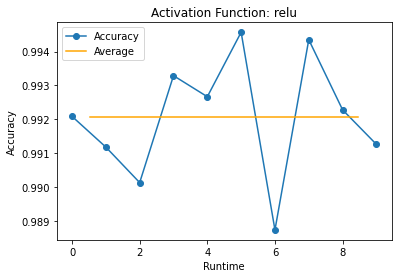

Activation function : logistic
The f1 accuracies for 10 runs  [0.9954013377926422, 0.9937395659432388, 0.9949874686716792, 0.9949811794228356, 0.9933166248955723, 0.9953878406708595, 0.9949748743718593, 0.9953917050691243, 0.9945674885081488, 0.9962264150943396]
Average f1 accuracy  0.9948974500440301


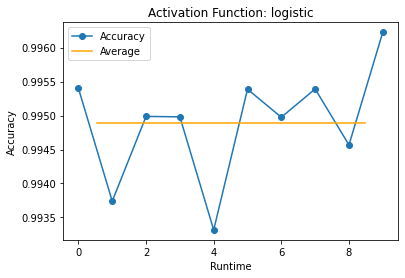

Activation function : tanh
The f1 accuracies for 10 runs  [0.9947643979057591, 0.9918766923557593, 0.9939469839281987, 0.9937159614578969, 0.9926670856903416, 0.9951892909433173, 0.9947622040645296, 0.9916352990380594, 0.9937317175094024, 0.9926854754440961]
Average f1 accuracy  0.993497510833736


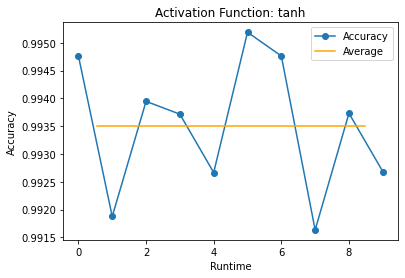

In [201]:
#Activation functions
max_mean_acc_1 = 0

for i in ['relu', 'logistic', 'tanh']:
  total_acc = MLP(i)
  mean_acc = np.mean(total_acc)
  if (mean_acc > max_mean_acc_1):
    max_mean_acc_1 = mean_acc
    act_fun = i
  
  print("Activation function :" ,i)
  print("The f1 accuracies for 10 runs " ,total_acc)
  print('Average f1 accuracy ', mean_acc)
  plotAcc(total_acc, mean_acc, None, f'Activation Function: {i}')


####Hidden Layers

Hidden layers : 1
The f1 accuracies for 10 runs  [0.9966513185433237, 0.9958141481791545, 0.9949769778149854, 0.9958141481791545, 0.9958088851634536, 0.9962343096234311, 0.9958123953098826, 0.9966499162479062, 0.9939088426801092, 0.9958088851634536]
Average f1 accuracy 0.9957479826904855


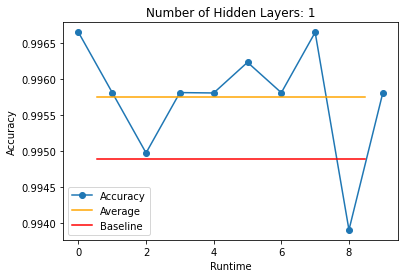

Hidden layers : 2
The f1 accuracies for 10 runs  [0.9960226083315888, 0.9932659932659933, 0.9926455137633956, 0.9951892909433173, 0.9953917050691243, 0.99539556299707, 0.9945652173913043, 0.9966372425388819, 0.9947687800795146, 0.9949748743718593]
Average f1 accuracy 0.994885678875205


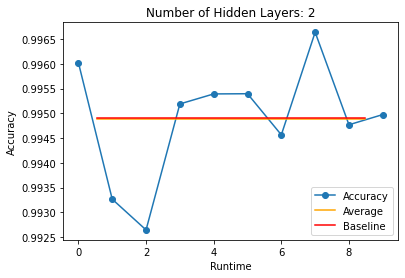

Hidden layers : 3
The f1 accuracies for 10 runs  [0.996232733361239, 0.9964442585233214, 0.9943384357307612, 0.9964397905759163, 0.9941520467836257, 0.996232733361239, 0.9932403886776511, 0.9966499162479062, 0.9958141481791545, 0.9958141481791545]
Average f1 accuracy 0.9955358599619967


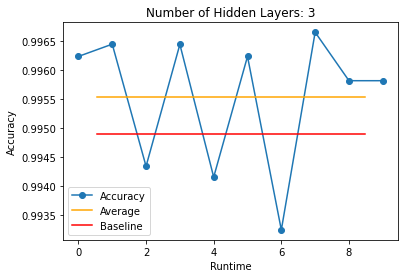

Hidden layers : 4
The f1 accuracies for 10 runs  [0.9926670856903416, 0.9962358845671266, 0.994314592545799, 0.995191302529793, 0.9949748743718593, 0.9935349322210636, 0.9958141481791545, 0.9953878406708595, 0.9905362776025236, 0.9941422594142261]
Average f1 accuracy 0.9942799197792744


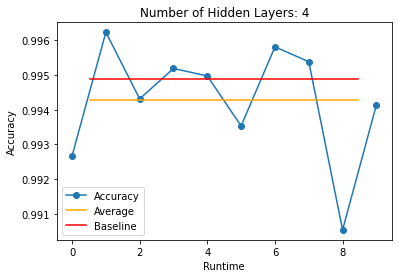

In [202]:
#using activation function that provides highest accuracy
#number of hidden layers = 1,2,3,4
max_mean_acc_2 = 0
# hidden_layers = [(8,), (16,8), (16,8,8), (16,8,8,8)]
hidden_layers = [(64,),(64,32),(128,),(100,100)]


for n, i in enumerate(hidden_layers, start=1):
  total_acc_2 = MLP(act_fun, i)
  mean_acc_2 = np.mean(total_acc_2)
  if (mean_acc_2> max_mean_acc_2):
    max_mean_acc_2 = mean_acc_2
    hidden_value = i
    
  print("Hidden layers :" ,n)
  print("The f1 accuracies for 10 runs " ,total_acc_2)
  print('Average f1 accuracy', mean_acc_2)
  plotAcc(total_acc_2, mean_acc_2, max_mean_acc_1, f'Number of Hidden Layers: {n}')


####Learning Rate

The f1 accuraries for the 10 runs are : [0.9881104033970276, 0.995609450135898, 0.9964427704540699, 0.9949685534591195, 0.9962311557788944, 0.9953897736797988, 0.9960226083315888, 0.9962358845671266, 0.9964397905759163, 0.9964427704540699]
Average f1 accuracy  0.995189316083351


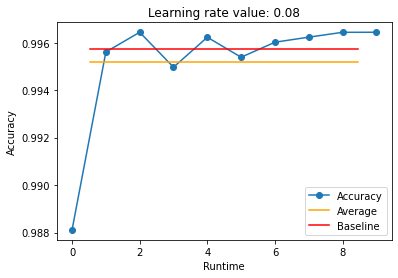

The f1 accuraries for the 10 runs are : [0.9960275977420029, 0.9955817378497791, 0.995793016407236, 0.9958071278825996, 0.996227996647108, 0.9962295768747381, 0.9960176063718298, 0.9953878406708595, 0.9960209424083769, 0.996024272860431]
Average f1 accuracy  0.9959117715714962


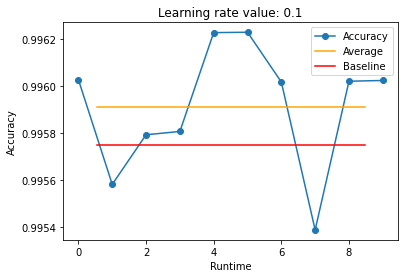

The f1 accuraries for the 10 runs are : [0.994560669456067, 0.9943526458899812, 0.9881806669480794, 0.9945583926329008, 0.9899159663865548, 0.9918153200419727, 0.9945583926329008, 0.9929018789144051, 0.9892789573260459, 0.9935241278462503]
Average f1 accuracy  0.9923647018075158


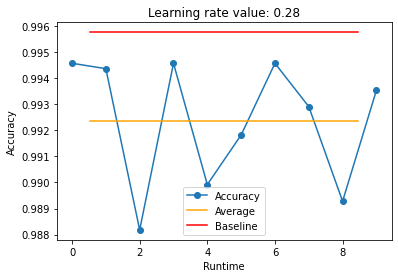

The f1 accuraries for the 10 runs are : [0.9933110367892977, 0.9875570302778929, 0.9949769778149854, 0.99329702555509, 0.9922415600754876, 0.99434554973822, 0.9926701570680628, 0.9877740303541315, 0.9937369519832985, 0.9891981719983381]
Average f1 accuracy  0.9919108491654803


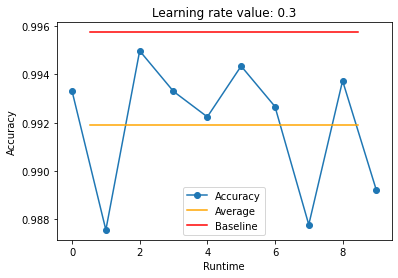

The f1 accuraries for the 10 runs are : [0.9934996854686517, 0.9924433249370277, 0.9924496644295302, 0.9928691275167786, 0.992875104777871, 0.9920235096557515, 0.9930832110668624, 0.99329702555509, 0.992875104777871, 0.9937159614578969]
Average f1 accuracy  0.9929131719643332


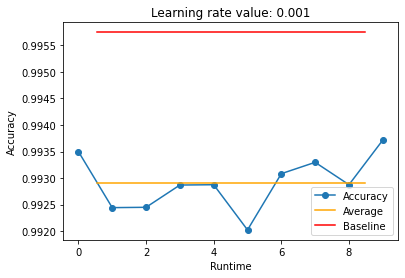

The f1 accuraries for the 10 runs are : [0.9989506820566632, 0.9966513185433237, 0.9989506820566632, 0.9960209424083769, 0.9989511222991398, 0.9987410826689047, 0.9964427704540699, 0.99644128113879, 0.9989511222991398, 0.9987400251994959]
Average f1 accuracy  0.9978841029124567


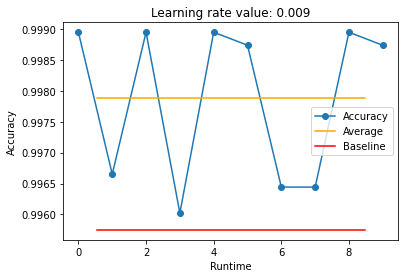

The f1 accuraries for the 10 runs are : [0.9957894736842104, 0.9968612680477087, 0.996232733361239, 0.9960209424083769, 0.995397489539749, 0.9960209424083769, 0.99644128113879, 0.9962358845671266, 0.9970662196144173, 0.9966513185433237]
Average f1 accuracy  0.9962717553313318


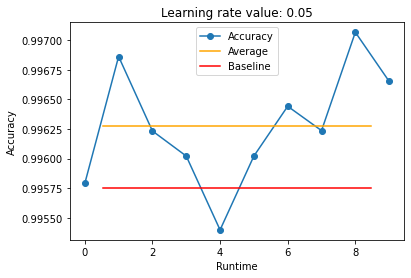

In [203]:
#using number of hidden layers that achieves highest average accuracy in Q2
#learning rate :  0.08 , 0.12, 0.28

max_mean_acc_3 = 0
learning_rate = [0.08 ,0.1, 0.28,0.30 , 0.001,0.009 ,0.05]

for i in learning_rate:
  total_acc_3 = MLP(af= act_fun, hidden_layer=(hidden_value),learning_rate_init=i )
  mean_acc_3 = np.mean(total_acc_3)
  if (mean_acc_3> max_mean_acc_3):
    max_mean_acc_3 = mean_acc_3
    max_rate = i

  print("The f1 accuraries for the 10 runs are :" ,total_acc_3)
  print('Average f1 accuracy ', mean_acc_3)
  plotAcc(total_acc_3, mean_acc_3, max_mean_acc_2, f'Learning rate value: {i}')

###Model Training

In [197]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(random_state= 42, activation='tanh', learning_rate_init=0.08 , hidden_layer_sizes=(64,))
model_mlp.fit(X_res1, y_res1)
mlp_pred = model_mlp.predict(minscaled_wrapper_test)
# save(mlp_pred,"mlp_pred.csv") # 0.89446% on public

##Stacking Model

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators=[
           ( 'sgd',SGDClassifier(random_state=42,early_stopping=True, validation_fraction=0.3, loss="perceptron" , alpha=0.001, penalty='l1')),
           ( 'model_mlp' , MLPClassifier(random_state= 42, activation='tanh', learning_rate_init=0.08 , hidden_layer_sizes=(64,))   )
]

stacking_clf = StackingClassifier(estimators=estimators, cv=5,n_jobs=-1, final_estimator=SVC(random_state=42))
stacking_clf.fit(X_res1, y_res1)
stack_pred=stacking_clf.predict(minscaled_wrapper_test)

#Decision tree

---
Grid Search was used to find the best parameters and the model were trained wih all the feaures (without the zero columns)



In [ ]:
# #grid search on all data without normalization
# param_grid = {'criterion': ['gini','entropy'],
#               'max_depth': [4,5,6],
#               'max_leaf_nodes' : [2,3,4,5],
#               'min_samples_split':[20,40,60,80],
#               'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01] 
#               }

# gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=1)
# gridSearch.fit(labelencode_train, labeltrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6], 'max_leaf_nodes': [2, 

In [ ]:
# print('Initial score: ', gridSearch.best_score_)
# print('Initial parameters:' , gridSearch.best_params_)

Initial score:  0.9583514831369362
Initial parameters: {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 20}


In [38]:
prunedtree = DecisionTreeClassifier(random_state = 42, max_leaf_nodes=5 ,max_depth=4, min_impurity_decrease=0.0001, min_samples_split=20)
prunedtree.fit(labelencode_train, labeltrain)
tree_pred=prunedtree.predict(labelencode_test)
# save(tree_pred,"tree_pred.csv")

# Models Predictions Combination


---
A for loop function was used to loop on each of the predicted label values of the three classifiers and if it found a classifier voting for 1, it will append 1 to the final list.

assumptions : based on the f1 score of the kaggle board, the three model performance are nerly similar, then the have the same weight.



In [186]:
final_predictions=[ ]
for  i in range(len(sgd_pred)):
  if (  stack_pred[i] or keras_pred[i] ==1 or tree_pred[i] ==1 ):
    final_predictions.append(1)
  else:
    final_predictions.append(0)

# save(final_predictions,"2_for_final.csv")